# Tutorial for Event-Related Potential (ERP) computing

Authors: Daniel Falcon, Renato Paredes
Laboratorio de Neurociencia Cognitiva Computacional - Departamento de Psicología, Pontificia Universidad Católica del Perú

This tutorial is based on [MNE-Python](https://mne.tools/stable/auto_tutorials/index.html).

## Environment setup

In [ ]:
!pip install mne
!wget https://github.com/renatoparedes/Neuro-PUCP/blob/main/EEG/sample_data.edf

In [1]:
!pip install mne==1.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 20.8 MB/s eta 0:00:00


In [62]:
data.astype({"MarkerValueInt": "int"}).dtypes

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer: Error while type casting for column 'MarkerValueInt'

Creating RawArray with float64 data, n_channels=15, n_times=7842
    Range : 0 ... 7841 =      0.000 ...    15.682 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


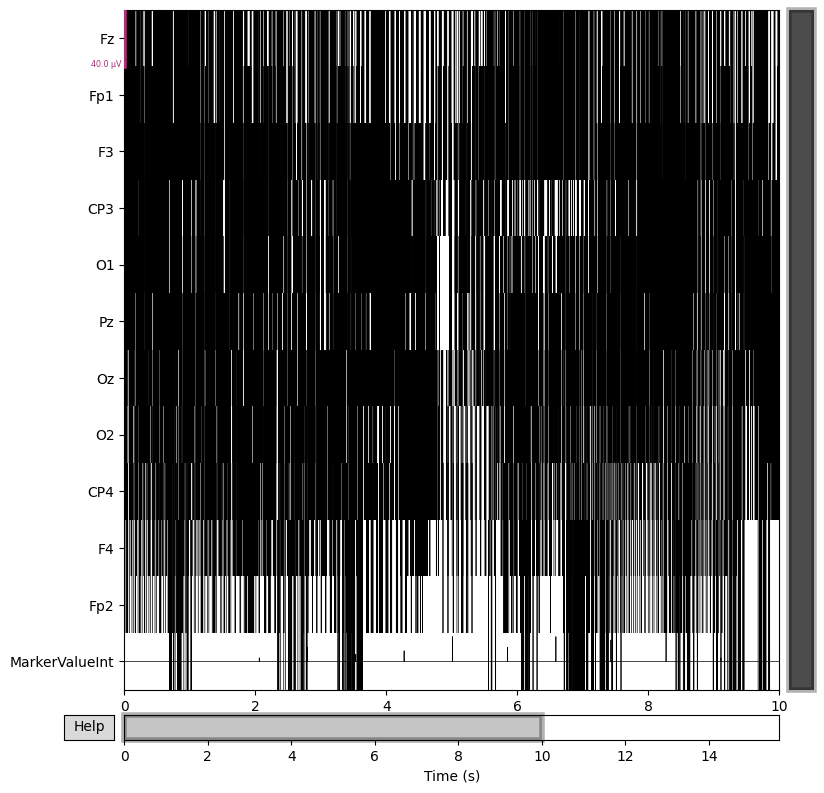

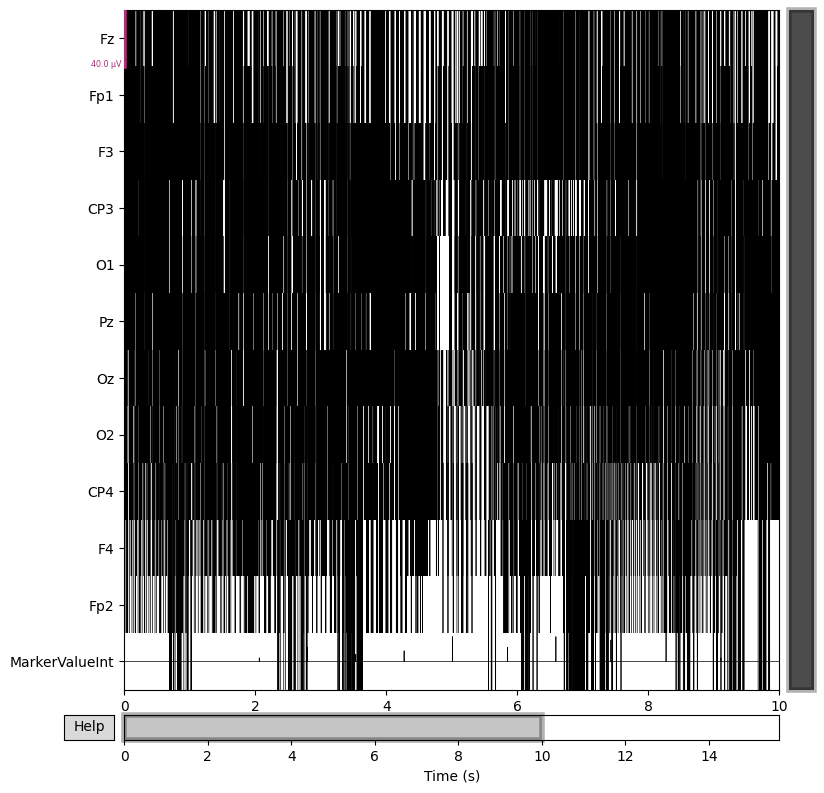

In [66]:
import numpy as np
import pandas as pd
import mne

data = pd.read_csv("test3_mod.csv", skiprows=0)
data["MarkerValueInt"] = data["MarkerValueInt"].fillna(0)
data["MarkerValueInt"] = data["MarkerValueInt"].astype(int)
# data.astype({'MarkerValueInt': 'int'}).dtypes

ch_names = [
    "Timestamp",
    "Time2",
    "CZ",
    "Fz",
    "Fp1",
    "F3",
    "CP3",
    "O1",
    "Pz",
    "Oz",
    "O2",
    "CP4",
    "F4",
    "Fp2",
    "MarkerValueInt",
]
ch_types = ["eeg"] * 14
ch_types.append("stim")

sfreq = 500
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data.transpose(), info)
# Select channels
raw.pick_channels(
    [
        "Cz",
        "Fz",
        "Fp1",
        "F3",
        "CP3",
        "O1",
        "Pz",
        "Oz",
        "O2",
        "CP4",
        "F4",
        "Fp2",
        "MarkerValueInt",
    ],
    ordered=False,
)
raw.info
raw.plot()

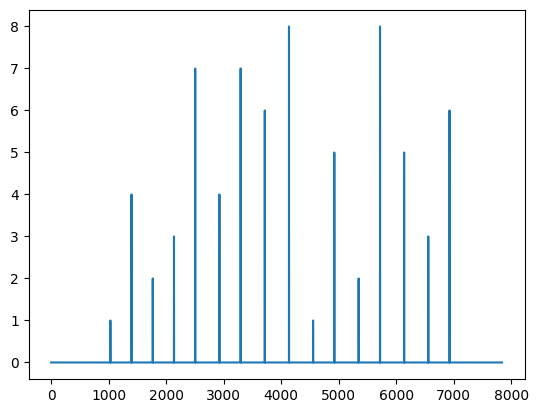

In [67]:
import matplotlib.pyplot as plt

plt.plot(raw.get_data()[-1])

In [68]:
raw.get_data()[-1]

array([0., 0., 0., ..., 0., 0., 0.])

In [69]:
events = mne.find_events(raw, stim_channel="MarkerValueInt", initial_event=True)
events

16 events found on stim channel MarkerValueInt
Event IDs: [1 2 3 4 5 6 7 8]


array([[1030,    0,    1],
       [1398,    0,    4],
       [1767,    0,    2],
       [2136,    0,    3],
       [2505,    0,    7],
       [2926,    0,    4],
       [3295,    0,    7],
       [3715,    0,    6],
       [4136,    0,    8],
       [4555,    0,    1],
       [4924,    0,    5],
       [5347,    0,    2],
       [5719,    0,    8],
       [6138,    0,    5],
       [6558,    0,    3],
       [6928,    0,    6]])

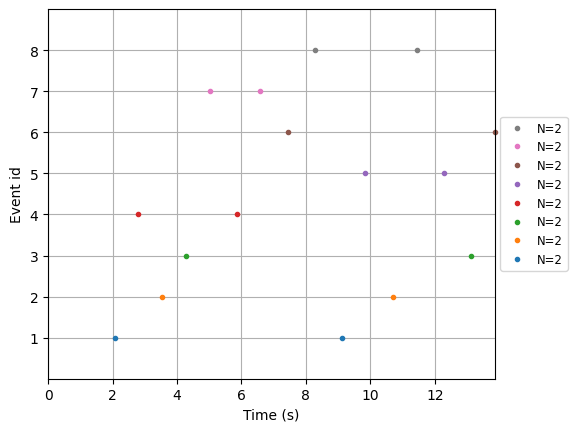

In [70]:
# Plot events
fig = mne.viz.plot_events(events, sfreq=raw.info["sfreq"], first_samp=raw.first_samp)

In [32]:
import mne

raw = mne.io.read_raw_edf("test2.edf", stim_channel="MarkerType", preload=True)
raw.get_channel_types()

# raw.annotations
# events = mne.find_events(raw)
# events

Extracting EDF parameters from /content/test2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7807  =      0.000 ...    60.992 secs...


['eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg']

In [29]:
mne.events_from_annotations(raw)

Used Annotations descriptions: ['1,1,-1,1', '1,1,-1,10', '2,2,-1,12', '2,2,-1,3', '3,3,-1,15', '3,3,-1,4', '4,4,-1,2', '4,4,-1,6', '5,5,-1,11', '5,5,-1,14', '6,6,-1,16', '6,6,-1,8', '7,7,-1,5', '7,7,-1,7', '8,8,-1,13', '8,8,-1,9']


(array([[1030,    0,    1],
        [1398,    0,    7],
        [1767,    0,    4],
        [2136,    0,    6],
        [2505,    0,   13],
        [2926,    0,    8],
        [3295,    0,   14],
        [3715,    0,   12],
        [4136,    0,   16],
        [4555,    0,    2],
        [4924,    0,    9],
        [5347,    0,    3],
        [5719,    0,   15],
        [6138,    0,   10],
        [6558,    0,    5],
        [6928,    0,   11]]),
 {'1,1,-1,1': 1,
  '1,1,-1,10': 2,
  '2,2,-1,12': 3,
  '2,2,-1,3': 4,
  '3,3,-1,15': 5,
  '3,3,-1,4': 6,
  '4,4,-1,2': 7,
  '4,4,-1,6': 8,
  '5,5,-1,11': 9,
  '5,5,-1,14': 10,
  '6,6,-1,16': 11,
  '6,6,-1,8': 12,
  '7,7,-1,5': 13,
  '7,7,-1,7': 14,
  '8,8,-1,13': 15,
  '8,8,-1,9': 16})

In [24]:
raw

<RawEDF | test2.edf, 12 x 7808 (61.0 s), ~755 kB, data loaded>

## Load data

In [22]:
# Load data
# raw = mne.io.read_raw_edf("sample_data.edf", stim_channel="MarkerType", preload=True)
raw = mne.io.read_raw_edf("test2.edf", stim_channel="MarkerType", preload=True)

# Select channels
raw.pick_channels(
    [
        "Cz",
        "Fz",
        "Fp1",
        "F3",
        "CP3",
        "O1",
        "Pz",
        "Oz",
        "O2",
        "CP4",
        "F4",
        "Fp2",
        "MarkerType",
    ]
)
raw.info

Extracting EDF parameters from /content/test2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7807  =      0.000 ...    60.992 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-22-6375f3d9d195>:6: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in an error because the following channel names are missing:
['MarkerType']
Either fix your included names or explicitly pass ordered=False.
  raw.pick_channels(


<Info | 8 non-empty values
 bads: []
 ch_names: Cz, Fz, Fp1, F3, CP3, O1, Pz, Oz, O2, CP4, F4, Fp2
 chs: 12 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: 2024-05-16 19:12:08 UTC
 nchan: 12
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>

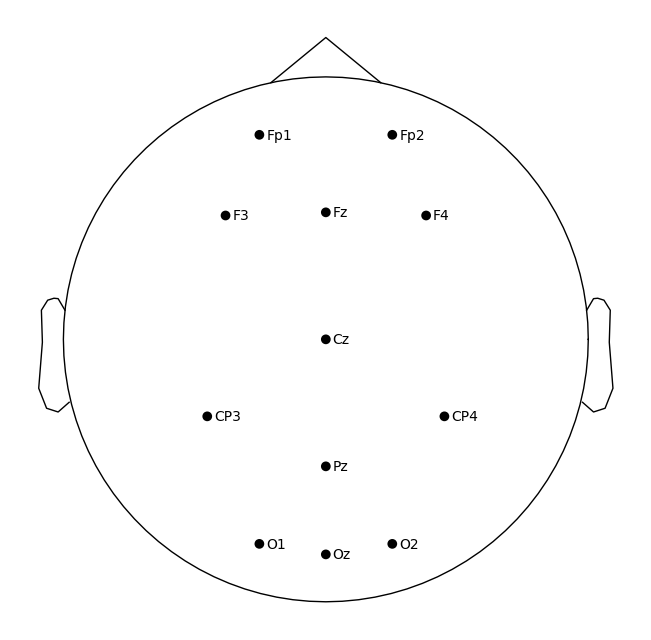

In [23]:
# Specify montage
easycap_montage = mne.channels.make_standard_montage("easycap-M1")
raw.set_montage(easycap_montage)

# Show montage
fig = raw.plot_sensors(show_names=True)

## EEG data pre-processing

In [10]:
# All EEG data were first bandpass filtered from 0.1 to 30 Hz.
l_freq = 0.1
h_freq = 30
raw.filter(l_freq, h_freq)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4225 samples (33.008 s)



<RawEDF | test2.edf, 12 x 7808 (61.0 s), ~755 kB, data loaded>

In [11]:
# Data were then re-referenced to the common average before continuing with paradigm-specific processing.
raw.set_eeg_reference("average")

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEDF | test2.edf, 12 x 7808 (61.0 s), ~755 kB, data loaded>

In [12]:
# We removed eye-blink artefacts using independent component analysis (ICA). See: https://mne.tools/stable/help/migrating.html
from mne.preprocessing import ICA

# Random state refers to SEED.
ica = ICA(n_components=5, max_iter="auto", random_state=97)
ica.fit(raw)

Fitting ICA to data using 12 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.5s.


<ICA | raw data decomposition, method: fastica (fit in 17 iterations on 7808 samples), 5 ICA components (12 PCA components available), channel types: eeg, no sources marked for exclusion>

In [13]:
explained_var_ratio = ica.get_explained_variance_ratio(raw)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"
    )

Fraction of eeg variance explained by all components: 0.9726628118829144


In [14]:
component_number = 0
explained_var_ratio = ica.get_explained_variance_ratio(
    raw, components=[component_number]
)

print(
    f"Fraction of variance explained by component #{component_number}:",
    explained_var_ratio["eeg"],
)

Fraction of variance explained by component #0: 0.3883472628578797


Creating RawArray with float64 data, n_channels=5, n_times=7808
    Range : 0 ... 7807 =      0.000 ...    60.992 secs
Ready.
Using matplotlib as 2D backend.


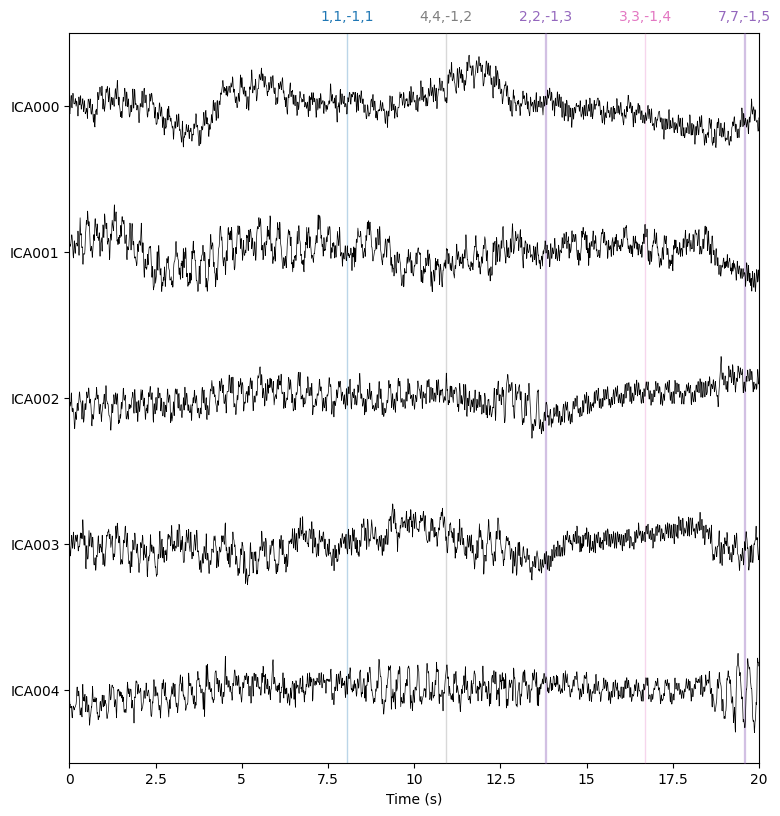

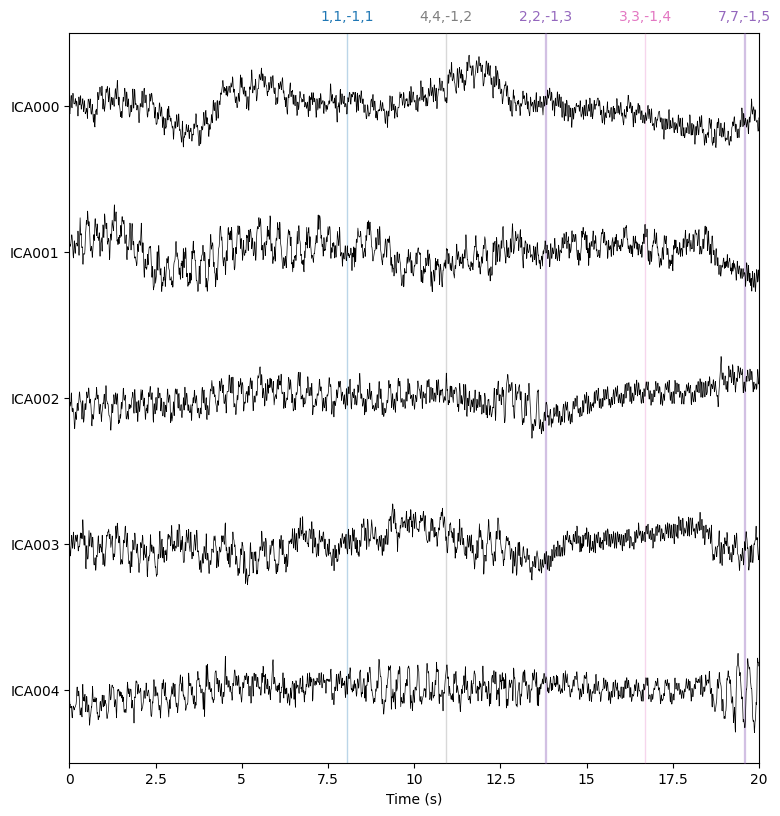

In [15]:
# Show indepedent components
raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)

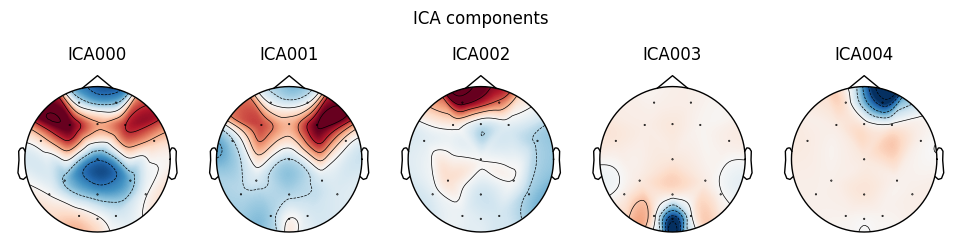

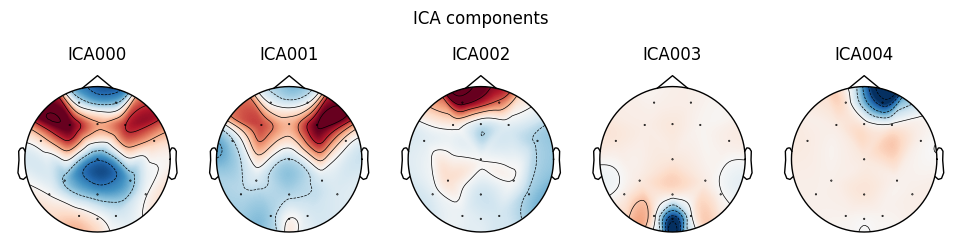

In [ ]:
ica.plot_components()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
625 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
625 matching events found
No baseline correction applied
0 projection items activated


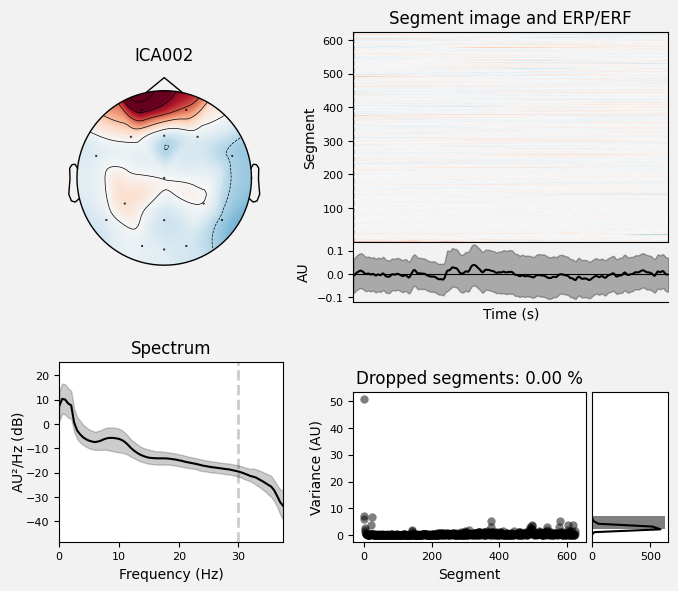

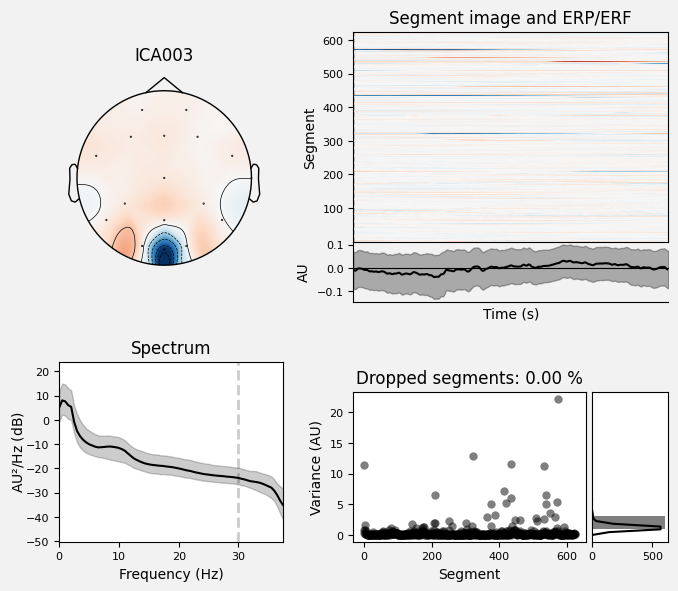

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [ ]:
# Explore components of interest
ica.plot_properties(raw, picks=[2, 3])

A guide on how to identify artifact components from ICA: https://labeling.ucsd.edu/tutorial/labels

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 1 ICA component
    Projecting back using 16 PCA components


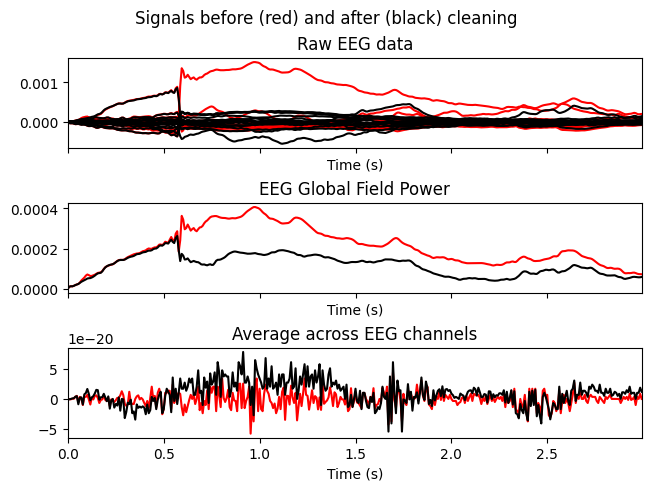

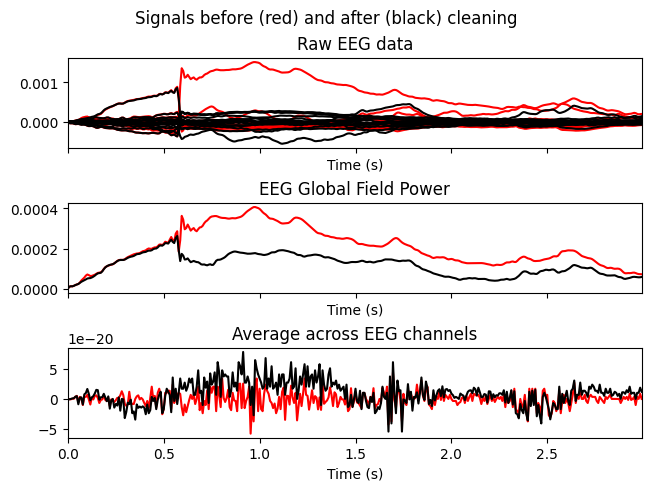

In [ ]:
# Show EEG signals before and after removing a component
ica.plot_overlay(raw, exclude=[2], picks="eeg")

In [16]:
# Exclude the desired component
ica.exclude = [2]

In [17]:
# Reconstrct the signal after removing the desired component
reconst_raw = raw.copy()
ica.apply(reconst_raw)

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 1 ICA component
    Projecting back using 12 PCA components


<RawEDF | test2.edf, 12 x 7808 (61.0 s), ~755 kB, data loaded>

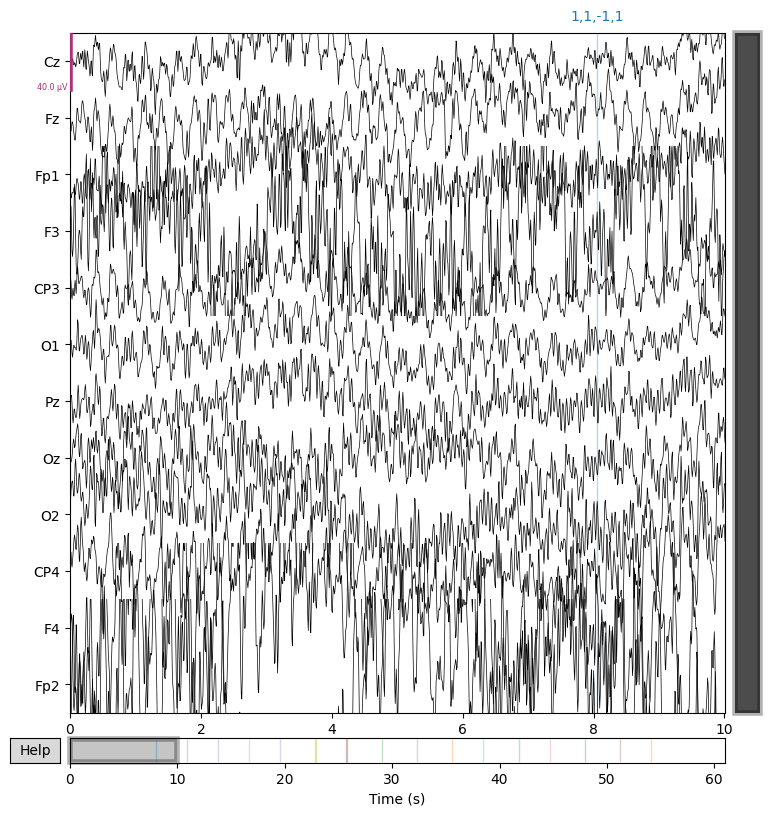

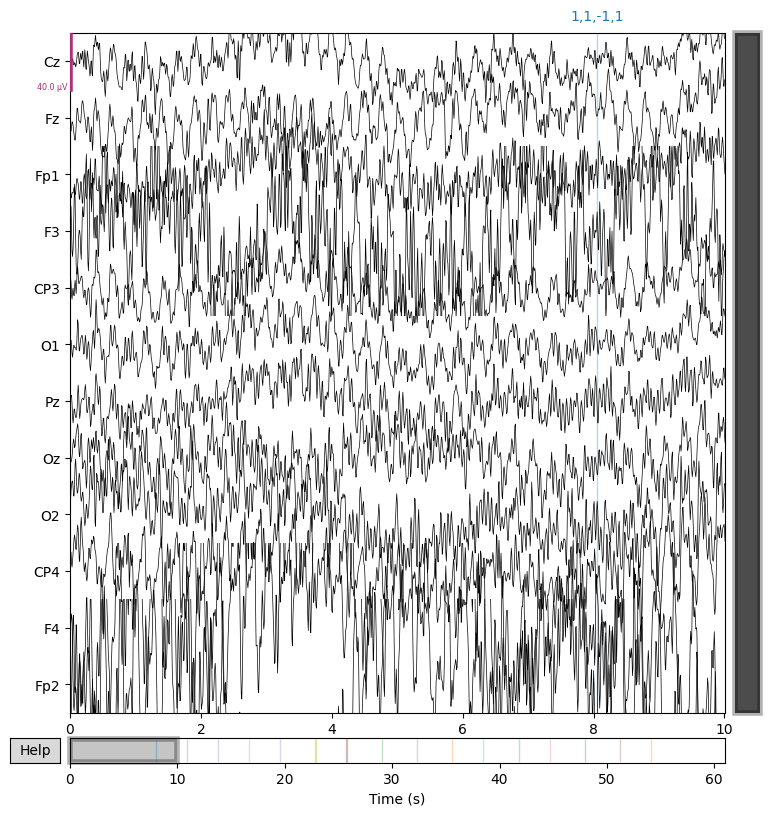

In [18]:
# Show reconstructed signal
reconst_raw.plot()

## Epoching

In [19]:
# Find events in the dataset
events = mne.find_events(reconst_raw)

# Plot events
fig = mne.viz.plot_events(
    events, sfreq=raw.info["sfreq"], first_samp=reconst_raw.first_samp
)

ValueError: No stim channels found, but the raw object has annotations. Consider using mne.events_from_annotations to convert these to events.

In [ ]:
# The pruned data were then epoched from −100 ms to 700 ms relative to stimulus onset.
# Each epoch was baseline corrected from −100 ms to 0 ms.
# Epochs with PTP amplitude values ±150 mV were excluded.

epochs = mne.Epochs(
    reconst_raw,
    events,
    tmin=-0.1,
    tmax=0.7,
    baseline=(-0.1, 0),
    reject=dict(eeg=150e-6),
)

Not setting metadata
86 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


Using data from preloaded Raw for 86 events and 104 original time points ...
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['F3', 'F4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F3', 'F4']
    Rejecting  epoch based on EEG : ['F3', 'F4']
    Rejecting  epoch based on EEG : ['F3', 'F4']
    Rejecting  epoch based on EEG : ['F3', 'F4']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'O1', 'F4']
    Rejecting  epoch based on EEG : ['F3', 'Oz', 'F4']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['Fz', 'F4']
    Rejecting  epoch based on EE

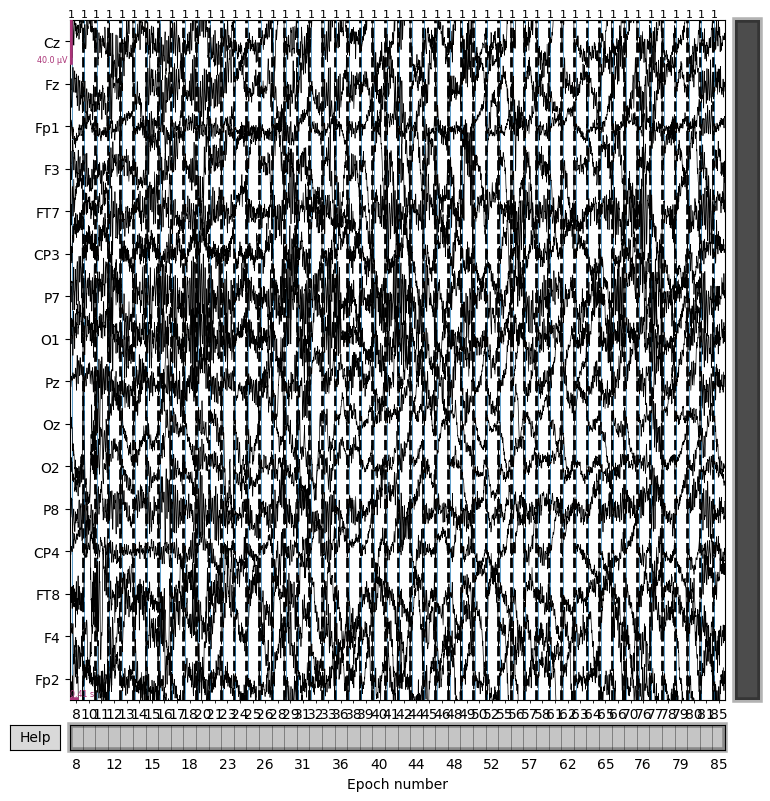

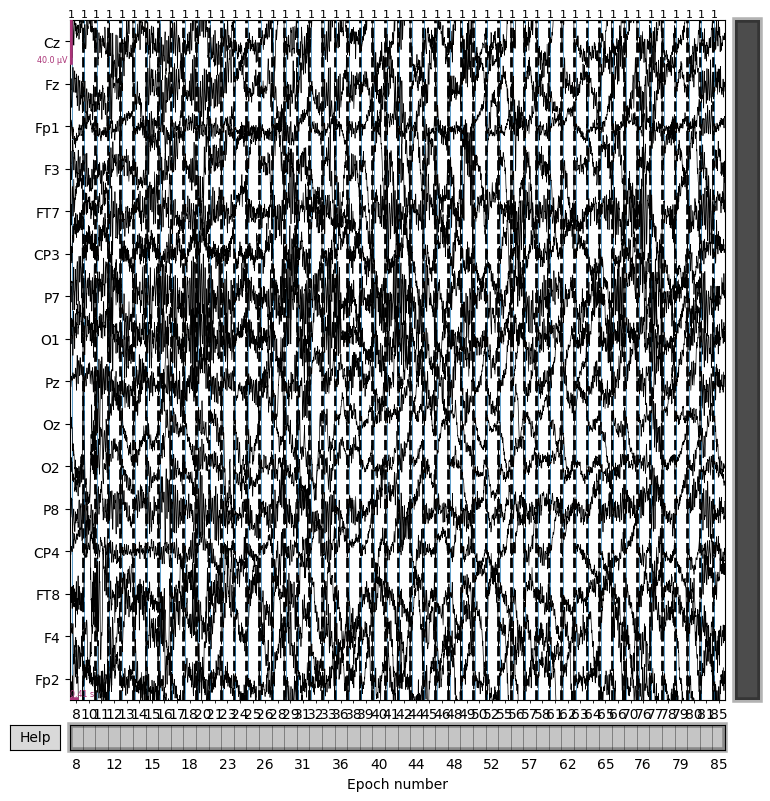

In [ ]:
epochs.plot(n_epochs=86, events=True)

## ERP calculation

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


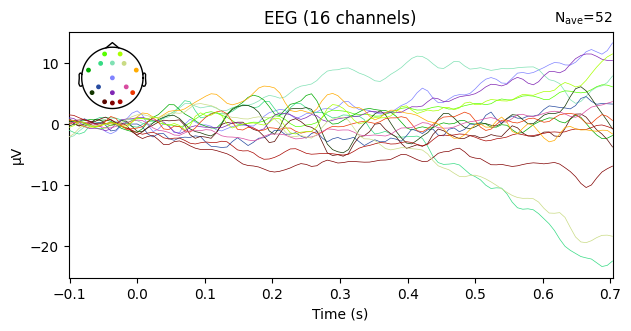

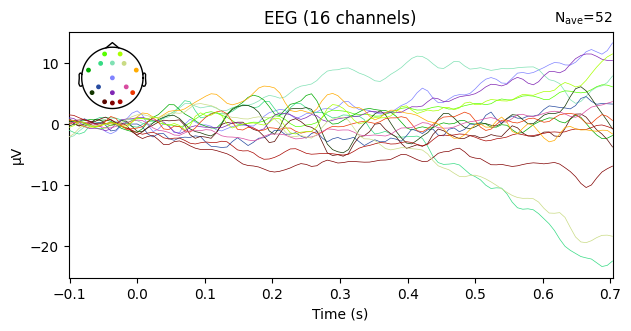

In [ ]:
# We then averaged accepted epochs to create ERP waveforms for both standard and deviant tones.
evoked = epochs.average()
evoked.plot()

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


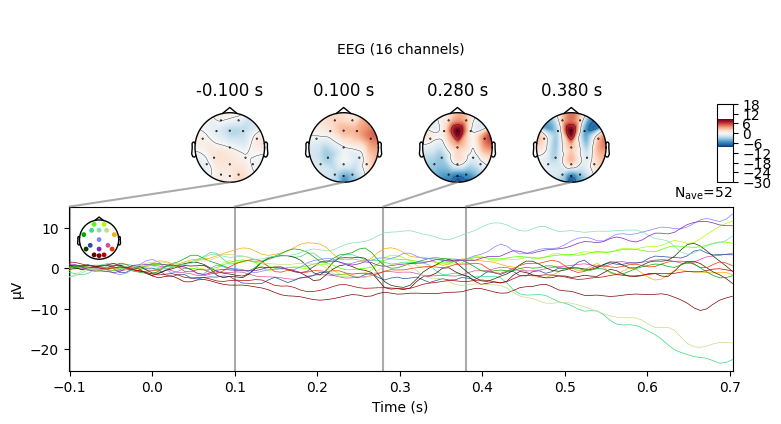

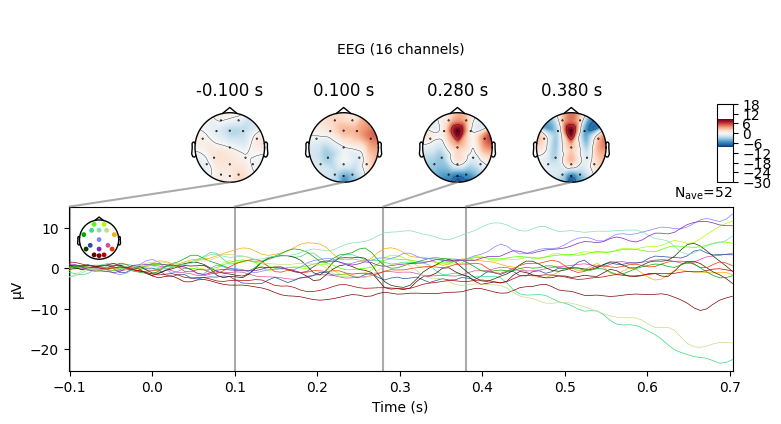

In [ ]:
# Plot times of interest
evoked.plot_joint(times=[-0.1, 0.1, 0.28, 0.38])

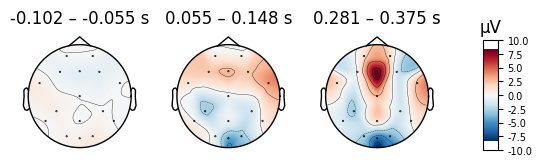

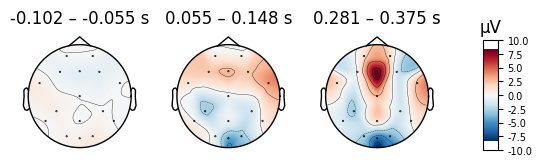

In [ ]:
# Plot topographic map of times of interest
evoked.plot_topomap(times=[-0.1, 0.1, 0.33], average=0.1)

Not setting metadata
52 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_4578/773739861.py:2: RuntimeWarning: Only one channel in group "Fz"; cannot combine by method "mean".
  epochs.plot_image(picks="Fz", combine="mean")


combining channels using "mean"


/tmp/ipykernel_4578/773739861.py:2: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  epochs.plot_image(picks="Fz", combine="mean")


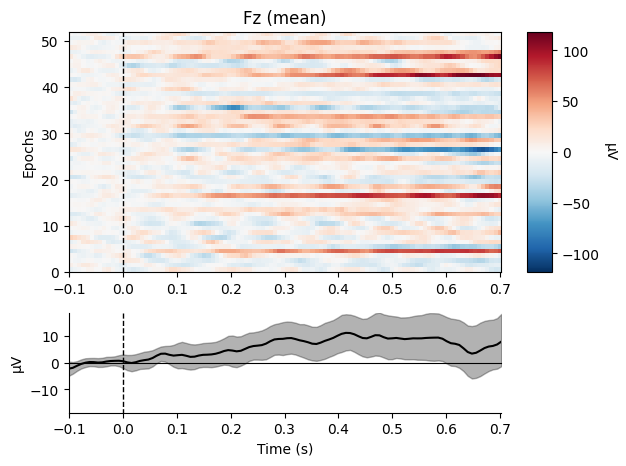

[<Figure size 640x480 with 3 Axes>]

In [ ]:
# Plot ERP per channel
epochs.plot_image(picks="Fz", combine="mean")

In [ ]:
# We calculated the P300 peak for each EEG system as the average waveform value over the pre-determined time window of 280–380 ms following stimulus onset.
epochs.load_data()
evoked_window = epochs.copy().average().crop(tmin=0.280, tmax=0.380)
evoked_channel = evoked_window.pick("Pz")
evoked_channel.get_peak(return_amplitude=True)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


('Pz', 0.34375, 2.076524283611792e-06)